# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd
import numpy as np
# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [2]:
# TODO
dtype = ({
'id_realEstates': 'int64',
'isNew': bool,
'realEstate_name': object,
'phone_realEstate':    'float64',
'url_inmueble': object,
'rooms':  'float64',
'bathrooms': 'float64',
'surface': 'float64',
'price': 'int64',
'date': object,
'description': object,
'address':  object,
'country': object,
'level1': object,
'level2': object,
'level3': object,
'level4': object,
'level5': object,
'level6': object,
'level7': object,
'level8': object,
'upperLevel': object,
'countryId': object,
'level1Id': 'int64',
'level2Id': 'int64',
'level3Id': 'int64',
'level4Id': 'int64',
'level5Id': 'int64',
'level6Id': 'int64',
'level7Id': 'int64',
'level8Id': 'int64',
'accuracy': 'int64',
'latitude': object,
'longitude': object,
'zipCode': object,
'customZone': 'float64',
})
df = pd.read_csv('assets/real_estate.csv', sep= ';', decimal='.', dtype=dtype)
propiedad_max = df.loc[df['price'].idxmax()]
calle_max = propiedad_max['address']
surface_max = propiedad_max['surface']
print(f" La casa con dirección en Calle {propiedad_max['address']},№ {propiedad_max['surface']} es la más cara y su precio es de {propiedad_max['price']:.0f} USD")

 La casa con dirección en Calle El Escorial,№ nan es la más cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [3]:
# TODO
df = pd.read_csv('assets/real_estate.csv', sep= ';')
propiedad_min = df.loc[df['price'].idxmin()]
calle_max = propiedad_min['address']
surface_max = propiedad_min['surface']
print(f" La casa con dirección en Calle {propiedad_min['address']},№ {propiedad_min['surface']} es la más cara y su precio es de {propiedad_min['price']:.0f} USD")

 La casa con dirección en Calle Parla,№ 262.0 es la más cara y su precio es de 0 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [4]:
# TODO
dtype = ({
'id_realEstates': 'int64',
'isNew': bool,
'realEstate_name': object,
'phone_realEstate':    'float64',
'url_inmueble': object,
'rooms':  'float64',
'bathrooms': 'float64',
'surface': 'float64',
'price': 'int64',
'date': object,
'description': object,
'address':  object,
'country': object,
'level1': object,
'level2': object,
'level3': object,
'level4': object,
'level5': object,
'level6': object,
'level7': object,
'level8': object,
'upperLevel': object,
'countryId': object,
'level1Id': 'int64',
'level2Id': 'int64',
'level3Id': 'int64',
'level4Id': 'int64',
'level5Id': 'int64',
'level6Id': 'int64',
'level7Id': 'int64',
'level8Id': 'int64',
'accuracy': 'int64',
'latitude': object,
'longitude': object,
'zipCode': object,
'customZone': 'float64',
})
df = pd.read_csv('assets/real_estate.csv', sep= ';', dtype=dtype)
max_area = df.loc[df['surface'].idxmax()] #sortmaxsurface
sstreet_max = max_area['surface']
###
propiedad_ssmax = df.loc[df['surface'].idxmax()]
calle_ssmax = propiedad_max['address']
###
propiedad_ssmin = df.loc[df['surface'].idxmin()]
calle_ssmin = propiedad_min['address']
###
#print((f" {sstreet_max:.0f}"), f" {propiedad_max['surface']}")
min_area = df.loc[df['surface'].idxmin()] #sortmaxsurface
sstreet_min = min_area['surface']
print((f" La casa más grande está ubicada en Calle {propiedad_ssmax['address']} Nº {sstreet_max:.0f}"), f" y su superficie es de {propiedad_max['surface']} metros")
print((f" La casa más pequeña está ubicada en Calle {propiedad_ssmin['address']} Nº {sstreet_min:.0f}"), f" y su superficie es de {propiedad_min['surface']} metros")
print("N° es superficie, sí se buscaba el numero interior en el que se encuentra la casa en la direccion que corresponde" \
"abria que limpiar la descripción")
print("OBSERVACION en el ejemplo 2 del ejercicio 3 muestra una Casa existente en el dataset \
      la superficie no tiene unidades, geometricamente la superficie se " \
"definiria como un polígono cerrado delimitado por puntos tipo \n" \
"\n superficie = [\n" \
"{puntox: 0, puntoy: 0},\n" \
"{puntox: 0, puntoy: 10},\n" \
"{puntox: 10, puntoy: 10}\n", \
"{puntox: 10, puntoy: 0}\n ]", \
     " \n entonces si es un poligono regular como un cuadrado y su area \n "
        "es de 262m² sus lados serian la raiz cuadrada de su área \n" \
            "aprox 16.19m y", "\n superficie = [\n" \
"{x: 0, y: 0},\n" \
"{x: 0, y: 16.19},\n" \
"{x: 16.19, y: 16.19}\n", \
"{x: 16.19, y: 0}\n]" )

 La casa más grande está ubicada en Calle Sevilla la Nueva Nº 249000  y su superficie es de nan metros
 La casa más pequeña está ubicada en Calle Calle Amparo,  Madrid Capital Nº 15  y su superficie es de 262.0 metros
N° es superficie, sí se buscaba el numero interior en el que se encuentra la casa en la direccion que correspondeabria que limpiar la descripción
OBSERVACION en el ejemplo 2 del ejercicio 3 muestra una Casa existente en el dataset       la superficie no tiene unidades, geometricamente la superficie se definiria como un polígono cerrado delimitado por puntos tipo 

 superficie = [
{puntox: 0, puntoy: 0},
{puntox: 0, puntoy: 10},
{puntox: 10, puntoy: 10}
 {puntox: 10, puntoy: 0}
 ]  
 entonces si es un poligono regular como un cuadrado y su area 
 es de 262m² sus lados serian la raiz cuadrada de su área 
aprox 16.19m y 
 superficie = [
{x: 0, y: 0},
{x: 0, y: 16.19},
{x: 16.19, y: 16.19}
 {x: 16.19, y: 0}
]


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [5]:
# TODO
import numpy as np
#for column in df.columns:
popsinl5 = df['level5'].unique()
    #print(f" populations: '{column}': {popsinl5}")
agruparl5 = df.groupby(['level5'])
print(agruparl5.first())
#print(df.apply(lambda level5: level5.unique()))

                       Unnamed: 0  id_realEstates  isNew  \
level5                                                     
 Madrid Capital                10       153215459  False   
Ajalvir                      1771       152605660  False   
Alcalá de Henares              46       151606708  False   
Alcobendas                    283       153240848  False   
Alcorcón                       86       153152077  False   
...                           ...             ...    ...   
Villar del Olmo              6127       143064727  False   
Villarejo de Salvanés        4774       153944477  False   
Villaviciosa de Odón           12       151795159  False   
Villavieja del Lozoya        7362       150868262  False   
Zarzalejo                    7193       153918372  False   

                                                 realEstate_name  \
level5                                                             
 Madrid Capital                                          modesta   
Ajalvir        

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [6]:
# TODO
dtype = ({
'id_realEstates': 'int64',
'isNew': bool,
'realEstate_name': object,
'phone_realEstate': 'float64',
'url_inmueble': object,
'rooms':  'float64',
'bathrooms': 'float64',
'surface': 'float64',
'price': 'int64',
'date': object,
'description': object,
'address':  object,
'country': object,
'level1': object,
'level2': object,
'level3': object,
'level4': object,
'level5': object,
'level6': object,
'level7': object,
'level8': object,
'upperLevel': object,
'countryId': object,
'level1Id': 'int64',
'level2Id': 'int64',
'level3Id': 'int64',
'level4Id': 'int64',
'level5Id': 'int64',
'level6Id': 'int64',
'level7Id': 'int64',
'level8Id': 'int64',
'accuracy': 'int64',
'latitude': object,
'longitude': object,
'zipCode': object,
'customZone': 'float64',
})
df = pd.read_csv('assets/real_estate.csv', sep= ';', dtype=dtype)
df
#print(ds.dtypes)
def NAs_xy(df):
    for i in range(len(df)):
        for j in range(len(df.columns)):
            isvaluenas = df.iloc[i, j]
            ifila = i + 1
            icolumna = j + 1
            if pd.isna(isvaluenas):
                print(f"True {ifila} / {icolumna}")
            else:
                print(f" False  {ifila} / {icolumna}")

def isdataframenull(df):
    if df.empty:
        print("DataFrame Vacio")
        return
    
valor_incellna = df.loc[262, 'isNew']
print(f" {valor_incellna} '262' / 'isNew'")
df.isnull().sum()
#df.isnull().any()

 False '262' / 'isNew'


Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [7]:
# TODO
#no aplica
df = pd.read_csv('assets/real_estate.csv', sep= ';', index_col=0)
df_dropped_alt = df[df.notnull().any(axis=1)]
print(df_dropped_alt.count())
print(ds.count())



id_realEstates      15335
isNew               15335
realEstate_name     15325
phone_realEstate    14541
url_inmueble        15335
rooms               14982
bathrooms           14990
surface             14085
price               15335
date                15335
description         15193
address             15335
country             15335
level1              15335
level2              15335
level3              15335
level4               8692
level5              15335
level6                708
level7              13058
level8               6756
upperLevel          15335
countryId           15335
level1Id            15335
level2Id            15335
level3Id            15335
level4Id            15335
level5Id            15335
level6Id            15335
level7Id            15335
level8Id            15335
accuracy            15335
latitude            15335
longitude           15335
zipCode                 0
customZone              0
dtype: int64
Unnamed: 0          15335
id_realEstates      15335

#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [8]:
# TODO
df = pd.read_csv('assets/real_estate.csv', sep= ';', index_col=0)
df[df['level5'] == "Arroyomolinos (Madrid)"].groupby('level5')['price'].mean()



level5
Arroyomolinos (Madrid)    294541.59854
Name: price, dtype: float64

#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


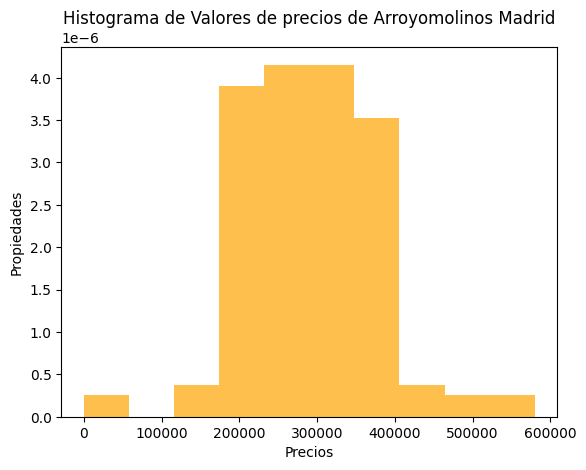

In [9]:
# TODO: Code
import matplotlib.pyplot as plt
df_histograma = df[df['level5'] == 'Arroyomolinos (Madrid)']
counts, bins, patches = plt.hist(df_histograma['price'], density=True, color='orange', alpha=0.7)
plt.xlabel("Precios")
plt.ylabel("Propiedades")
plt.title("Histograma de Valores de precios de Arroyomolinos Madrid")
plt.show()

**TODO: Markdown**. Se observa que menos de 1 propiedad cuesta menos de 10,000 y la distribucion media ronda entre los 20,000 y 40,000

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [10]:
# TODO
valdemorillomean = ds[ds['level5'] == "Valdemorillo"].groupby('level5')['price'].mean()
galapagarmean = ds[ds['level5'] == "Galapagar"].groupby('level5')['price'].mean()

print(f"Precio promedio de{valdemorillomean  , galapagarmean} \n \n Las casas de Valdemorillo son en promedio 1.05% más caras \n Valdemorillo/Galapagar = 363860/360063 = 1.05%")


Precio promedio de(level5
Valdemorillo    363860.293103
Name: price, dtype: float64, level5
Galapagar    360063.202381
Name: price, dtype: float64) 
 
 Las casas de Valdemorillo son en promedio 1.05% más caras 
 Valdemorillo/Galapagar = 363860/360063 = 1.05%


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

¿A partir de surface?

In [11]:
# TODO
df['pps'] = df['price'] / df['surface']
valdemorillomean_surface = ds[ds['level5'] == "Valdemorillo"].groupby('level5')['surface'].mean()
valdemorillomean_price = ds[ds['level5'] == "Valdemorillo"].groupby('level5')['price'].mean()
galapagarmean_surface = ds[ds['level5'] == "Galapagar"].groupby('level5')['surface'].mean()
galapagarmean_price = ds[ds['level5'] == "Galapagar"].groupby('level5')['price'].mean()

#convertir a float
galapagarmean_pricefloat = galapagarmean_price.values[0]
galapagarmean_surfacefloat =galapagarmean_surface.values[0]
valdemorillomean_surfacefloat = valdemorillomean_surface.values[0]
valdemorillomean_pricefloat = valdemorillomean_price.values[0]
divresultadog = float (galapagarmean_pricefloat) / galapagarmean_surfacefloat
divresultadov = float (valdemorillomean_pricefloat) / galapagarmean_surfacefloat
print("Valdemorillo", divresultadog)
print("Galapagar", divresultadov)
print("Valdemorillo, es en promedio mas barata que Galapagar ")

Valdemorillo 1178.5257998852853
Galapagar 1190.9540884506687
Valdemorillo, es en promedio mas barata que Galapagar 


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

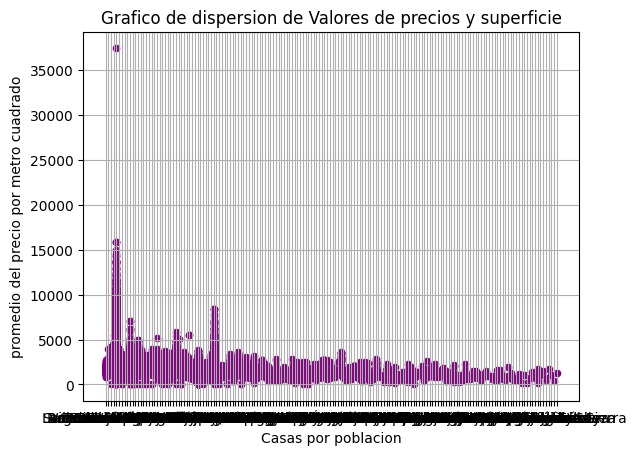

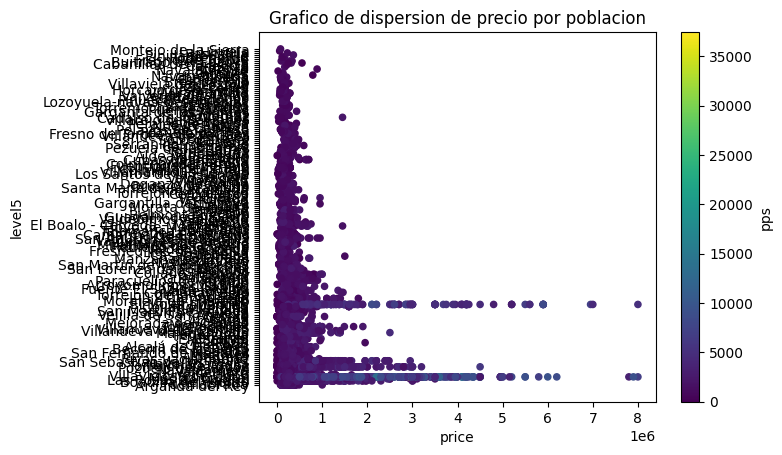

In [12]:
# TODO: Código
# TODO: Code
import matplotlib.pyplot as plt
#ax1 = df.plot.scatter('surface', 'price')
df.plot.scatter(x='level5', y='pps',  c='purple')
plt.title("Grafico de dispersion de Valores de precios y superficie")
plt.xlabel("Casas por poblacion")
plt.ylabel("promedio del precio por metro cuadrado")
plt.grid(True)
plt.show()
df.plot(kind = 'scatter', x = 'price', y = 'level5', c='pps', cmap='viridis')
plt.title("Grafico de dispersion de precio por poblacion")
plt.show()


**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [13]:
# TODO
# TODO
num_clases_realEstate_name = ds['realEstate_name'].nunique()
print(f" {num_clases_realEstate_name}")


 1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [14]:
# TODO
lvel5maxhouse = df['level5'].max()
print(lvel5maxhouse)


Zarzalejo


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [15]:
# TODO
#dtype = {'level5': object}
df = pd.read_csv('assets/real_estate.csv', sep=';')
sd = ds.squeeze()
df_cinturonsur = sd[sd['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])]
subpoblacionsur = df_cinturonsur.groupby('level5')
subpoblacionsur.describe(include=[object])
print(subpoblacionsur.head())


     Unnamed: 0  id_realEstates  isNew  \
1             2       153867863  False   
3             4       152776331  False   
85           86       153152077  False   
94           95       153995577  False   
109         110       153586414  False   
161         162       153440116  False   
169         170       153920011  False   
189         190       153950689  False   
193         194       153925845  False   
214         215       153950663  False   
219         220       153971366  False   
232         233       152842726  False   
233         234       152842686  False   
269         270       153861480  False   
272         273       153936099  False   
328         329       153902131  False   
381         382       153880899  False   
765         766       154002468   True   
816         817       154001779   True   
827         828       154001766   True   

                               realEstate_name  phone_realEstate  \
1            tecnocasa fuenlabrada ferrocarril   

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

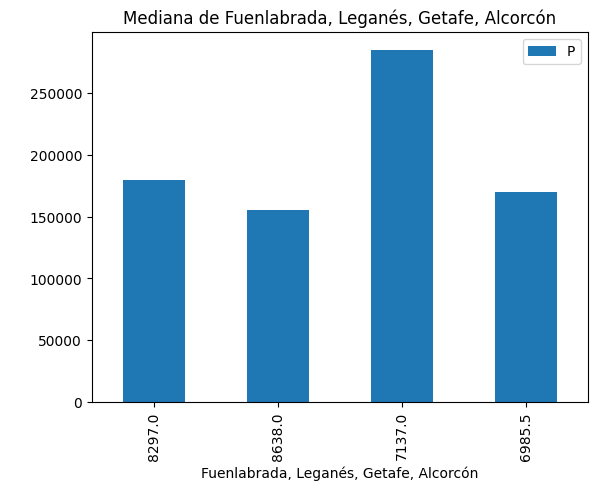

In [16]:
# TODO: Code
subpoblacionsurmediana = subpoblacionsur.median(numeric_only=True)
subpoblacionsurmediana.plot(kind='bar', x='Unnamed: 0', y='price')
plt.title('Mediana de Fuenlabrada, Leganés, Getafe, Alcorcón')
plt.xlabel('Fuenlabrada, Leganés, Getafe, Alcorcón')
plt.ylabel(' ')
plt.legend('Precio promedio de Fuenlabrada, Leganés, Getafe, Alcorcón')
plt.show()
#print(subpoblacionsurmean)
#print(subpoblacionsur)

**TODO: Markdown**. En el grafico se muestra la mediana de cada poblacion por separado, es decir el resultado de enlistar cada una de los precios de cada ciudad y tomar el valor en el centro de cada una de estas listas, es decir la medida de la tendencia central, los valores numerales de cada ciudad se muestran de izquierda a derecha en el mismo orden que las ciudades, y el numero muestra la mitad de los valores del conjunto que son menores o iguales a la mediana y la otra mitad son mayores o iguales


#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [27]:
# TODO
subpoblacionsurmedia = subpoblacionsur.mean(numeric_only=True)
subpoblacionsurvar = subpoblacionsur.var(numeric_only=True)
print("Media", subpoblacionsurmedia)
print("Varianza",subpoblacionsurvar)


Media               Unnamed: 0  id_realEstates     isNew  phone_realEstate  \
level5                                                                 
Alcorcón     7967.536842    1.530447e+08  0.063158      9.145020e+08   
Fuenlabrada  8215.957082    1.530729e+08  0.012876      9.140399e+08   
Getafe       7151.348276    1.522503e+08  0.024138      9.129043e+08   
Leganés      8019.365979    1.531854e+08  0.005155      9.142316e+08   

                rooms  bathrooms     surface          price  countryId  \
level5                                                                   
Alcorcón     2.914894   1.623656  105.913295  230071.052632        0.0   
Fuenlabrada  3.025974   1.445415  103.624365  177198.021459        0.0   
Getafe       3.151724   1.865052  126.896266  265040.500000        0.0   
Leganés      2.906736   1.518135  105.852273  208682.010309        0.0   

             level1Id  level2Id  level3Id  level4Id  level5Id  level6Id  \
level5                                   

#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [18]:
# TODO
subpoblacionsur
propiedad_maxfs = subpoblacionsur['price'].idxmax()
calle_maxfs = subpoblacionsur['price'].idxmin()
surface_maxfs = subpoblacionsur['surface'].idxmin()
print(propiedad_maxfs)
print(calle_maxfs)
print(surface_maxfs)

level5
Alcorcón        5585
Fuenlabrada    11561
Getafe          2881
Leganés        10412
Name: price, dtype: int64
level5
Alcorcón       7349
Fuenlabrada       1
Getafe         1003
Leganés         189
Name: price, dtype: int64
level5
Alcorcón        5580
Fuenlabrada    11082
Getafe          1758
Leganés        10217
Name: surface, dtype: int64


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

In [19]:
# TODO

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [20]:
# TODO

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

In [21]:
# TODO
print("como puedo tomar 4 poblaciones diferentes de la columna 5 del subconjunto de la pregunta 14?")
print("el subconjunto de la pregunta 14 solo tiene 4 poblaciones")

como puedo tomar 4 poblaciones diferentes de la columna 5 del subconjunto de la pregunta 14?
el subconjunto de la pregunta 14 solo tiene 4 poblaciones


el subconjunto de la pregunta 14 solo tiene 4 poblaciones

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [22]:
from ipyleaflet import Map, basemaps

# Mapa centrado en Madrid
map = Map(center = (40.35, -3.8), zoom = 11.5, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [23]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
